In [1]:
import pandas as pd

In [10]:
df=pd.read_csv("clean_data.csv")

In [11]:
df.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0,3,3,0,0,0,2
1,0,5,3,0,0,0,2
2,1,15,13,0,0,0,2
3,0,2,2,0,0,0,2
4,0,4,3,0,0,0,2


In [12]:
X=df.drop(["PCOS (Y/N)"],axis=1)
y = df[["PCOS (Y/N)"]]

In [13]:
X.shape

(534, 6)

In [14]:
y.shape

(534, 1)

In [16]:
from imblearn.combine import SMOTEENN

resample = SMOTEENN(sampling_strategy=1/1, random_state =0)
X, y = resample.fit_resample(X, y)

In [18]:
X.shape

(564, 6)

In [19]:
y.shape

(564, 1)

In [22]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix

In [28]:
from yellowbrick.classifier import confusion_matrix

def vis_conf(model, X_test, y_test):
    plt.figure(figsize=(6, 5))
    visualizer = confusion_matrix(
        model,
        X_test, y_test,
        is_fitted=True,
        classes=['Negative', 'Positive']
    )
    visualizer.show();

In [29]:
def test_results(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn)/(tp + fp + tn + fn)
    print("Accuracy: ", '{:.2f}'.format(accuracy * 100))
    print("True Negative:", tn)
    print("True Positve:", tp)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print()
    print("-------------------------------------------------------")
    print("Negative Class Results")
    precision = (tp / (tp + fp)) 
    recall =  (tp  / (tp + fn)) 
    f1_score = (2 * (precision * recall) / (precision + recall)) 
    print("Precision (N): ", '{:.2f}'.format(precision * 100))
    print("Recall (N): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (N):" ,  '{:.2f}'.format(f1_score * 100))
    print()
    print("-------------------------------------------------------")
    print("Positive Class Results")
    precision = (tn / (tn + fn))
    recall =  (tn  / (tn + fp))
    f1_score = (2 * (precision * recall) / (precision + recall))
    print("Precision (P): ", '{:.2f}'.format(precision * 100))
    print("Recall (P): ", '{:.2f}'.format(recall * 100))
    print("F1 Score (P):" , '{:.2f}'.format(f1_score * 100))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


# Setting Column Names from dataset
X_train.columns = X.columns
X_test.columns = X.columns

In [25]:
from sklearn.svm import SVC

In [26]:
svm = SVC(kernel="linear", gamma='auto', probability= True, random_state=0)

In [27]:
svm.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True, random_state=0)

In [30]:
test_results(svm, X_test, y_test)

Accuracy:  97.35
True Negative: 57
True Positve: 53
False Positive: 2
False Negative: 1

-------------------------------------------------------
Negative Class Results
Precision (N):  96.36
Recall (N):  98.15
F1 Score (N): 97.25

-------------------------------------------------------
Positive Class Results
Precision (P):  98.28
Recall (P):  96.61
F1 Score (P): 97.44


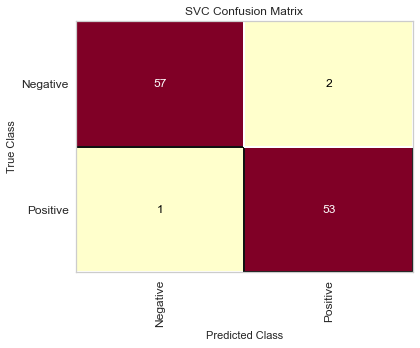

In [31]:
vis_conf(svm, X_test, y_test)

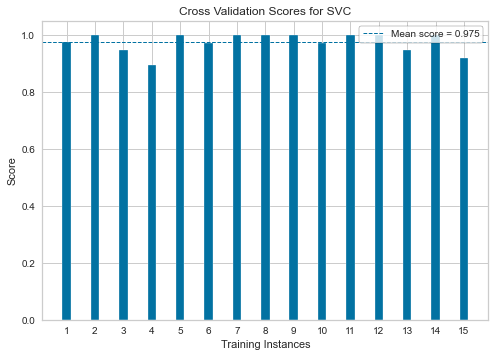

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [32]:
cv = StratifiedKFold(
    n_splits=15,random_state=0,
    shuffle=True
) 
visualizer = CVScores(svm, cv=cv, scoring='f1_weighted', is_fitted=False, stratify = True)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors= 9, p = 1, metric= 'minkowski')

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [36]:
test_results(knn, X_test, y_test)

Accuracy:  95.58
True Negative: 57
True Positve: 51
False Positive: 2
False Negative: 3

-------------------------------------------------------
Negative Class Results
Precision (N):  96.23
Recall (N):  94.44
F1 Score (N): 95.33

-------------------------------------------------------
Positive Class Results
Precision (P):  95.00
Recall (P):  96.61
F1 Score (P): 95.80


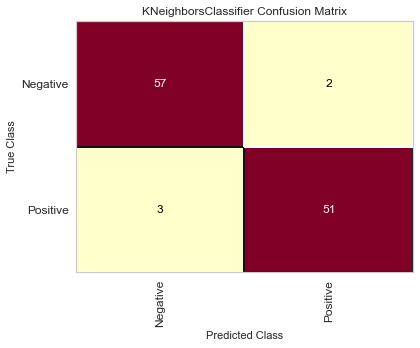

In [37]:
vis_conf(knn, X_test, y_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=1500, criterion="entropy", random_state=0)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1500, random_state=0)

In [41]:
test_results(rf, X_test, y_test)

Accuracy:  99.12
True Negative: 58
True Positve: 54
False Positive: 1
False Negative: 0

-------------------------------------------------------
Negative Class Results
Precision (N):  98.18
Recall (N):  100.00
F1 Score (N): 99.08

-------------------------------------------------------
Positive Class Results
Precision (P):  100.00
Recall (P):  98.31
F1 Score (P): 99.15


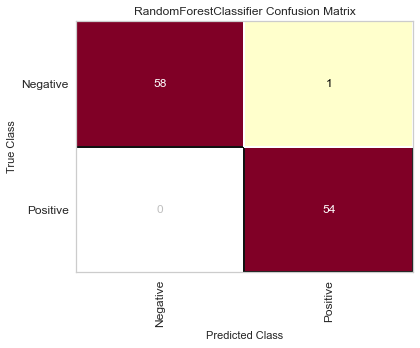

In [42]:
vis_conf(rf, X_test, y_test)

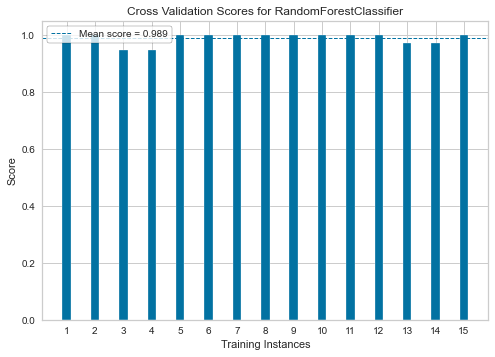

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [43]:
cv = StratifiedKFold(
    n_splits=15,random_state=0,
    shuffle=True
) 
visualizer = CVScores(rf, cv=cv, scoring='f1_weighted', is_fitted=False, stratify = True)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [55]:
X.to_csv("X.csv")

In [56]:
y.to_csv("y.csv")